# NSCI0007 Exam Specimen Answers

NB the specimen answers are one way to answer the questions. There are other valid solutions.

In [1]:
# Question 1

import numpy as np

G_1 = np.array([[0, 1, 1, 0, 0],
                [1, 0, 1, 0, 1],
                [1, 1, 0, 1, 1],
                [0, 0, 1, 0, 1],
                [0, 1, 1, 1, 0]])



def neighbours(A, i):
    r = A[i,:]
    n = []
    for j in range(len(r)):
        if r[j] == 1:
            n.append(j)
    return n

neighbours(G_1, 0)

# 4/4 if correct in general case
# -1 if minor error in calculation
# -2 if incorrect algorithm (e.g. does not correctly )


[1, 2]

In [2]:
# Question 2

def clustering_coefficient(A, i):
    x = neighbours(A, i)
    n = len(x)
    if n <= 1: return 0
    m = 0
    for j in range(n):
        for k in range(j+1, n):
            if A[x[j], x[k]] == 1:
                m += 1

    return m / (n**2 - n)


clustering_coefficient(G_1, 2)

# 5/5 if correct in general case
# -1 if minor error in calculation
# -1 if no return statement
# -2 if incorrect algorithm

## NB the calculation must work for a general graph, not just this specific graph.

0.25

In [3]:
# Question 3

def is_path(A, nodes):
    for i in range(len(nodes) - 1):
        if A[nodes[i], nodes[i+1]] == 0:
            return False
    nodes_unique = []
    for i in nodes:
        if i in nodes_unique:
            return False
        nodes_unique.append(i)
    return True
        
print(is_path(G_1, [0, 2, 1, 4]))
print(is_path(G_1, [0, 1, 2, 0]))
print(is_path(G_1, [0, 3, 4]))

# 5/5 if correct in general case
# -1 if minor error in calculation
# -1 if no return statement
# -2 if incorrect algorithm

True
False
False


In [4]:
# Question 4

def average_clustering_coefficient(A):
    c = []
    for i in range(len(A)):
        c.append(clustering_coefficient(A, i))
    return np.mean(c)
        

print(average_clustering_coefficient(G_1))

# 4/4 if correct in general case
# 3/4 if incorrect only due to error in clustering_coefficient function
# 0/4 if incorrect


0.3833333333333333


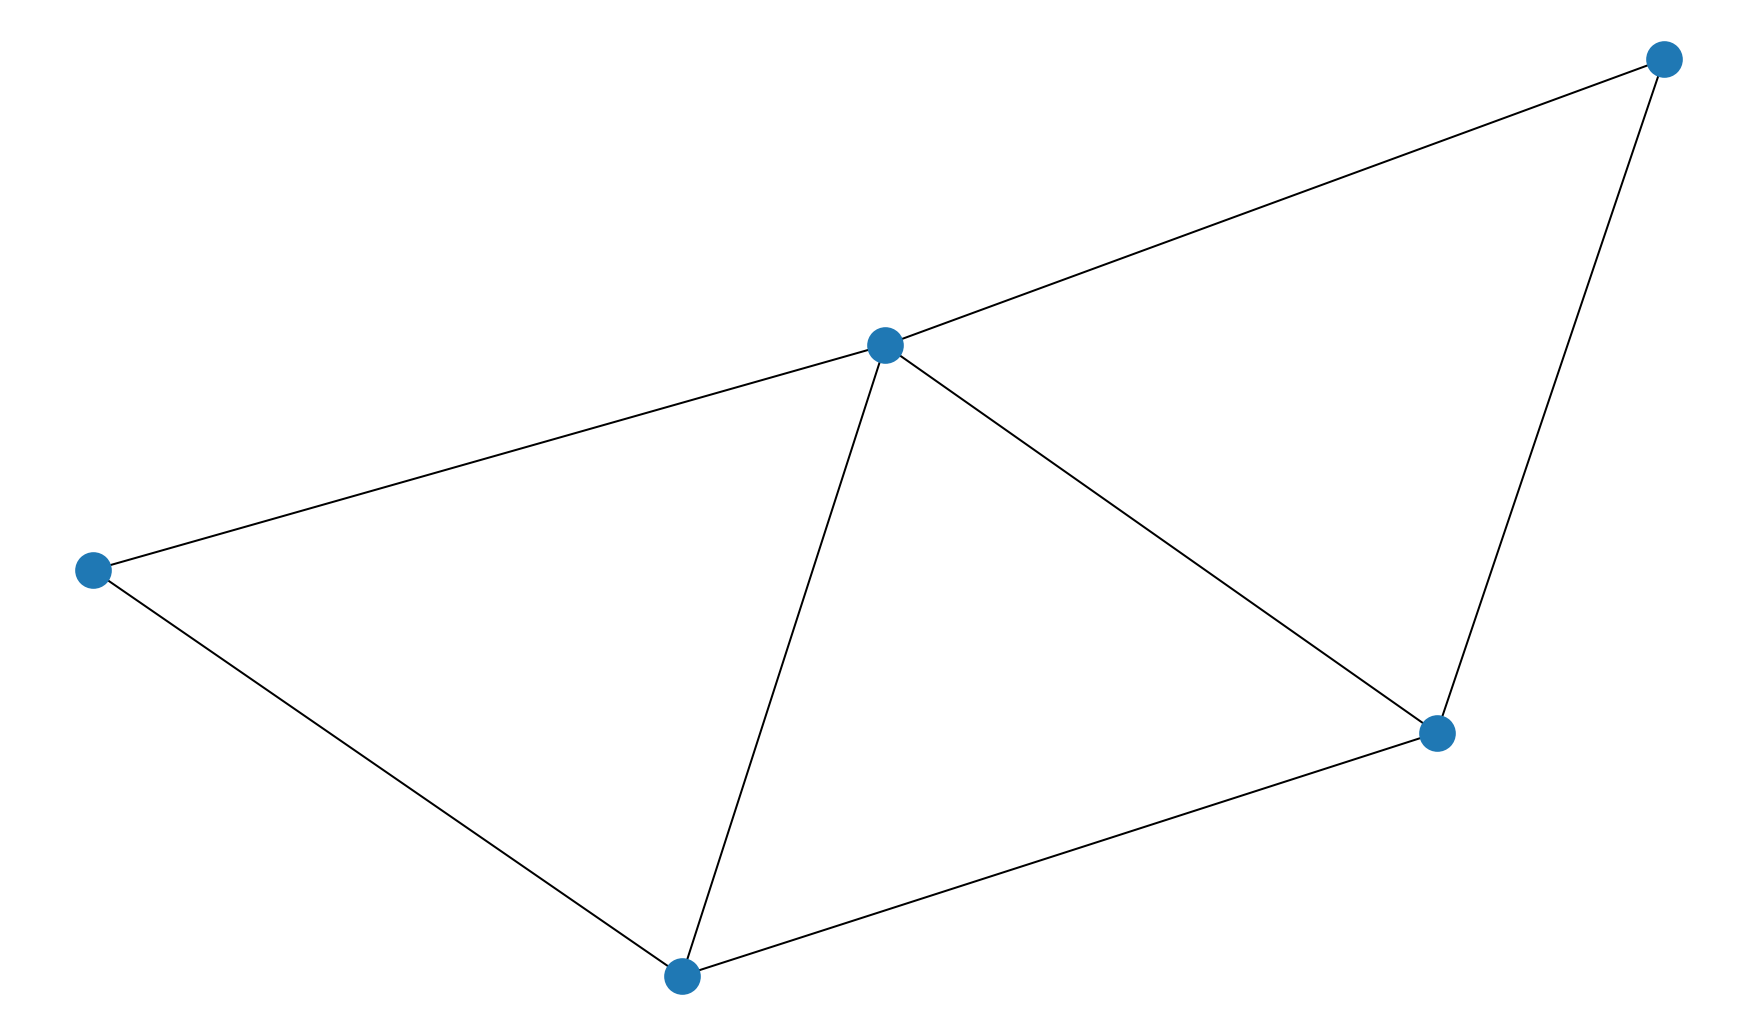

In [5]:
# Question 5

import networkx as nx
import matplotlib.pyplot as plt

def generate_graph(A):
    G = nx.Graph()
    n = len(A)
    for i in range(n):
        for j in range(n):
            if A[i,j] == 1:
                G.add_edge(i, j)
    return G

G1 = generate_graph(G_1)
nx.draw(G1)

# 4/4 if correctly plotted the graph (any plotting style OK)
# 3/4 if plotted digraph or other minor error
# 2/4 if correctly created graph object but no graph plotted
            

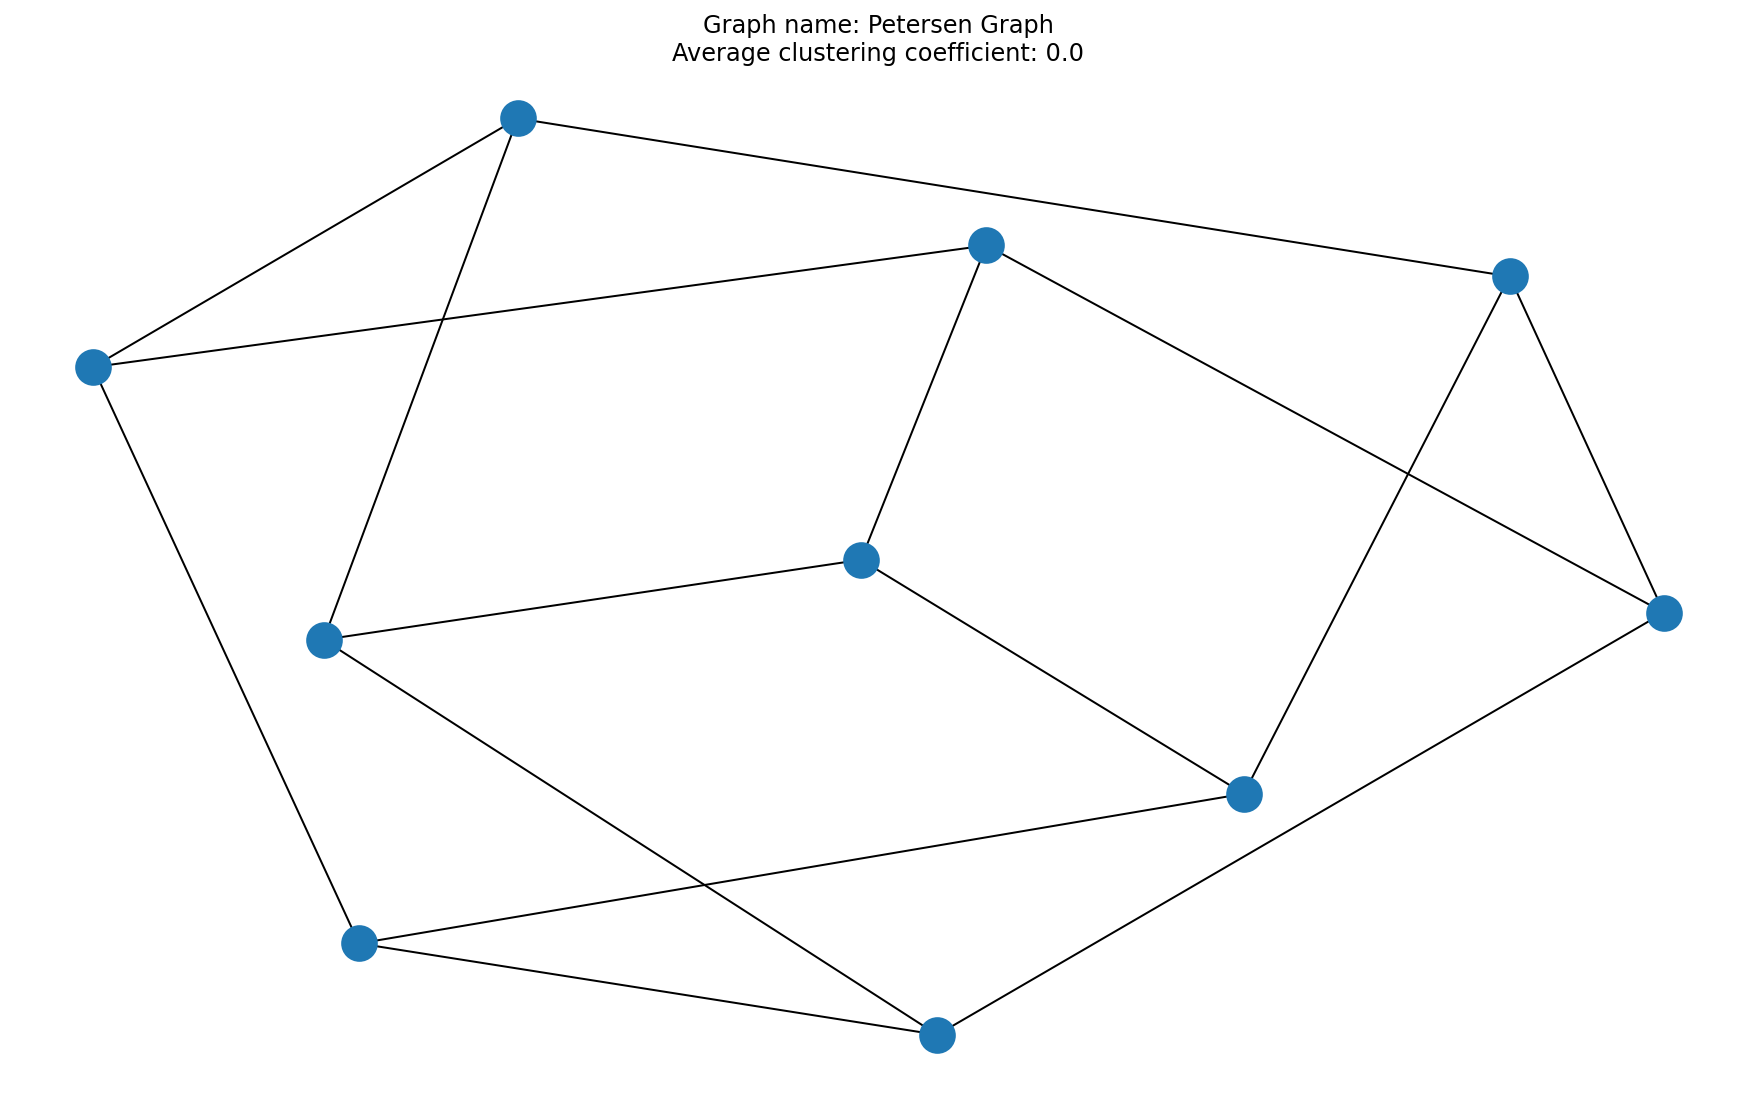

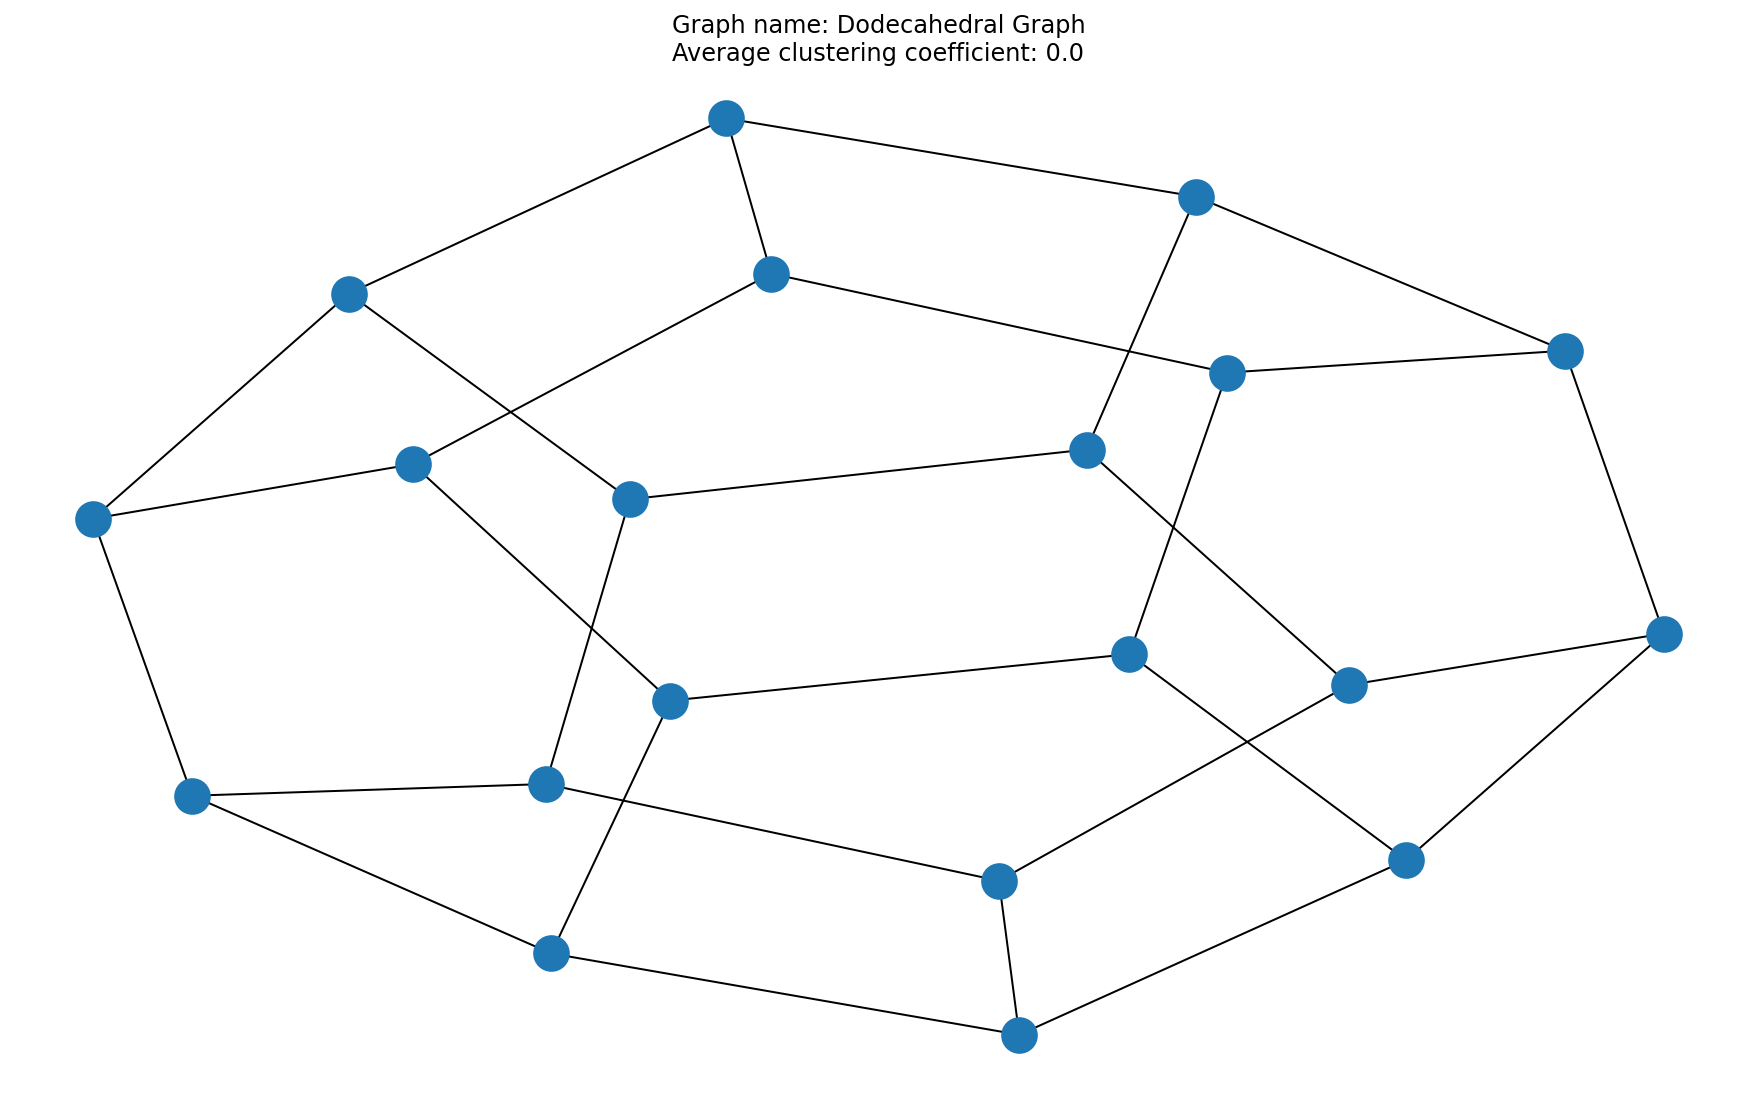

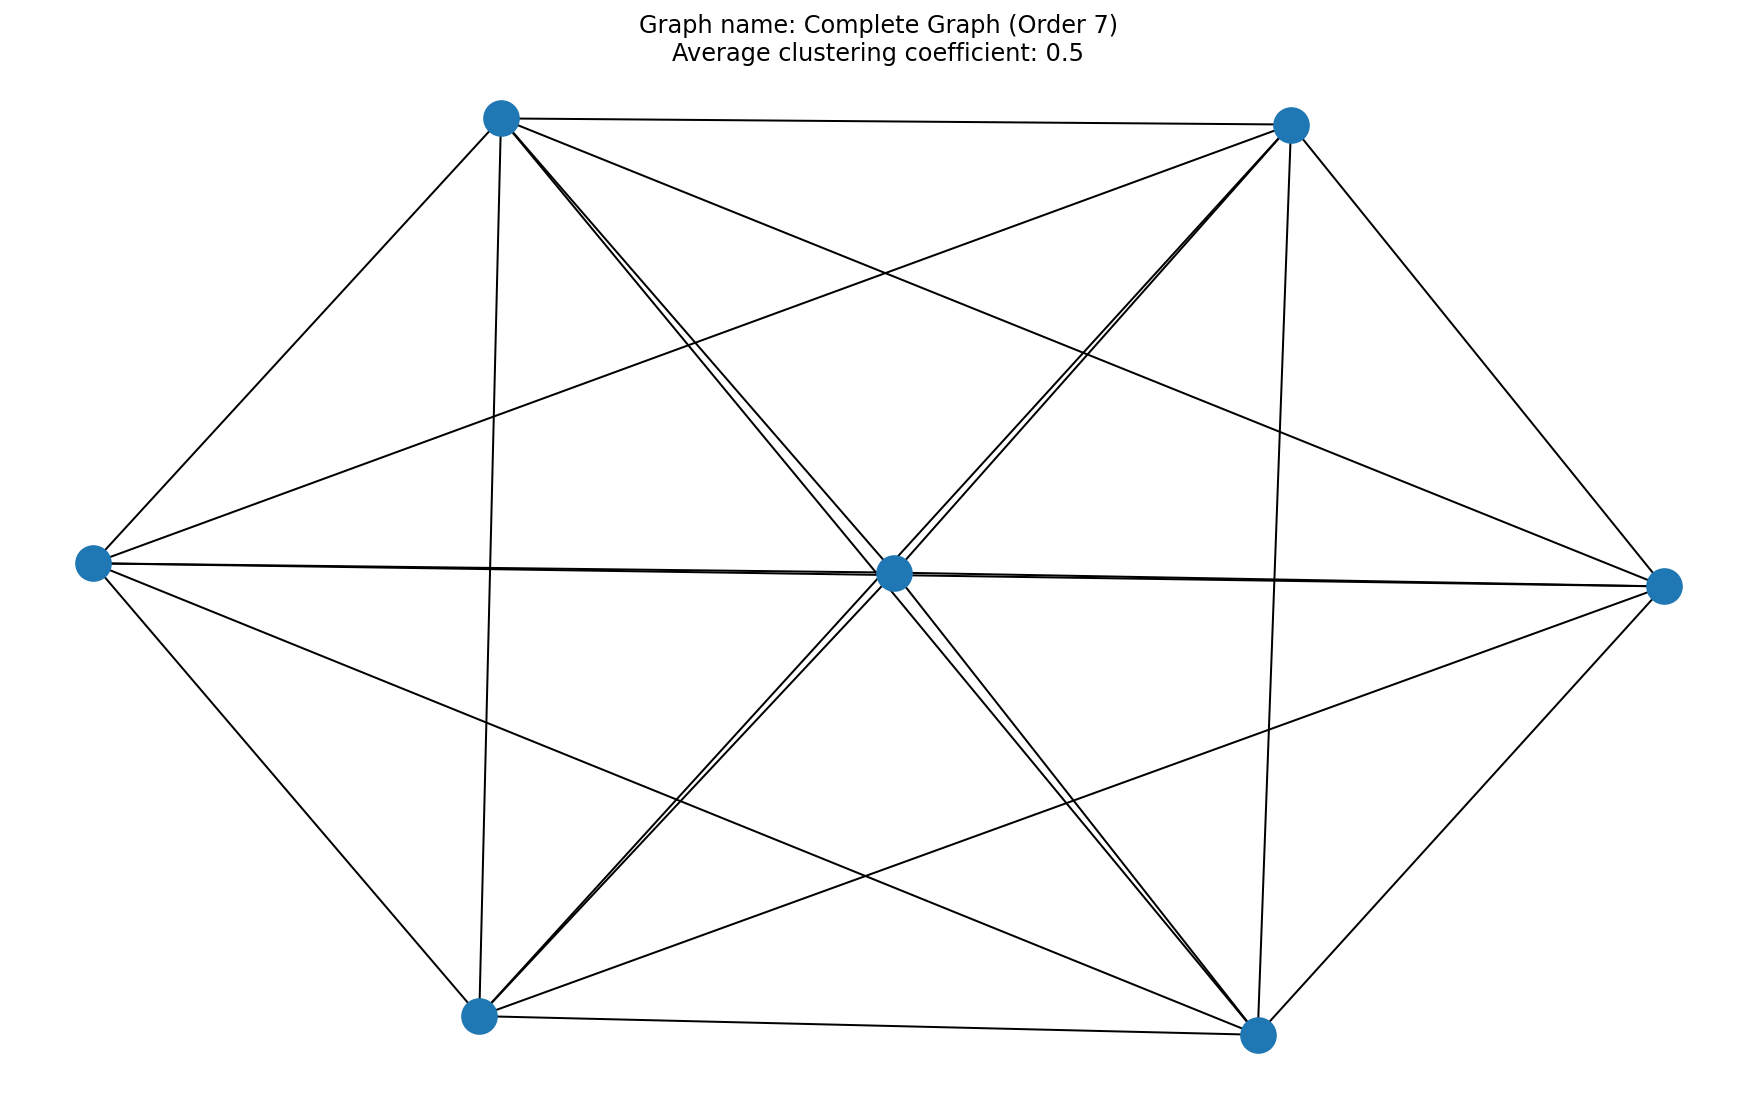

In [6]:
# Question 6

for i in range(3):
    with open("graph0{}.txt".format(i)) as f:
        title = f.readline().strip()
        n = int(f.readline())
        A = np.zeros((n, n))
        for i in range(n):
            x = f.readline().strip()
            for j in range(n):
                A[i,j] = int(x[j])
        G = generate_graph(A)
        plt.figure()
        nx.draw(G)        
        acc = average_clustering_coefficient(A)
        
        x = plt.title("Graph name: {}\nAverage clustering coefficient: {}".format(title, acc))


# 8/8 for 3 correctly plotted graphs
# -1 for each error in figures
# 4/8 if correctly read and parsed file and generated matrix, but no graphs plotted
# 2/8 if correctly read and parsed file but matrix incorrect

# NB It is not necessary to use a loop (repeated code is OK) but the data MUST be read from the file